In [1]:
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.python.summary import summary_iterator

def extract_scalars_from_event_file(event_file):
    scalars = {}
    for event in summary_iterator.summary_iterator(event_file):
        for value in event.summary.value:
            if value.HasField('simple_value'):
                if value.tag not in scalars:
                    scalars[value.tag] = []
                scalars[value.tag].append(value.simple_value)
    return scalars



fold_metrics = {}

for event_file_path in Path('LUNA/arm2').glob('**/events.out.tfevents.*'):

    arm = 'arm2'
    fold = event_file_path.parts[-2]

    event_file = event_file_path.as_posix()
    fold_metrics[fold] = pd.DataFrame.from_dict(extract_scalars_from_event_file(event_file), orient='index').T




2024-03-14 14:27:49.435684: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 14:27:49.435895: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 14:27:49.438439: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 14:27:49.468658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 14:27:49.990032

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [2]:
fold_metrics['luna_fold1'].columns

Index(['train_loss', 'avg_train_loss', 'avg_train_cls_loss',
       'avg_train_box_reg_loss', 'train_lr',
       'val_mAP_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_nodule_mAP_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_AP_IoU_0.10_MaxDet_100', 'val_nodule_AP_IoU_0.10_MaxDet_100',
       'val_mAR_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_nodule_mAR_IoU_0.10_0.50_0.05_MaxDet_100',
       'val_AR_IoU_0.10_MaxDet_100', 'val_nodule_AR_IoU_0.10_MaxDet_100',
       'val_metric'],
      dtype='object')

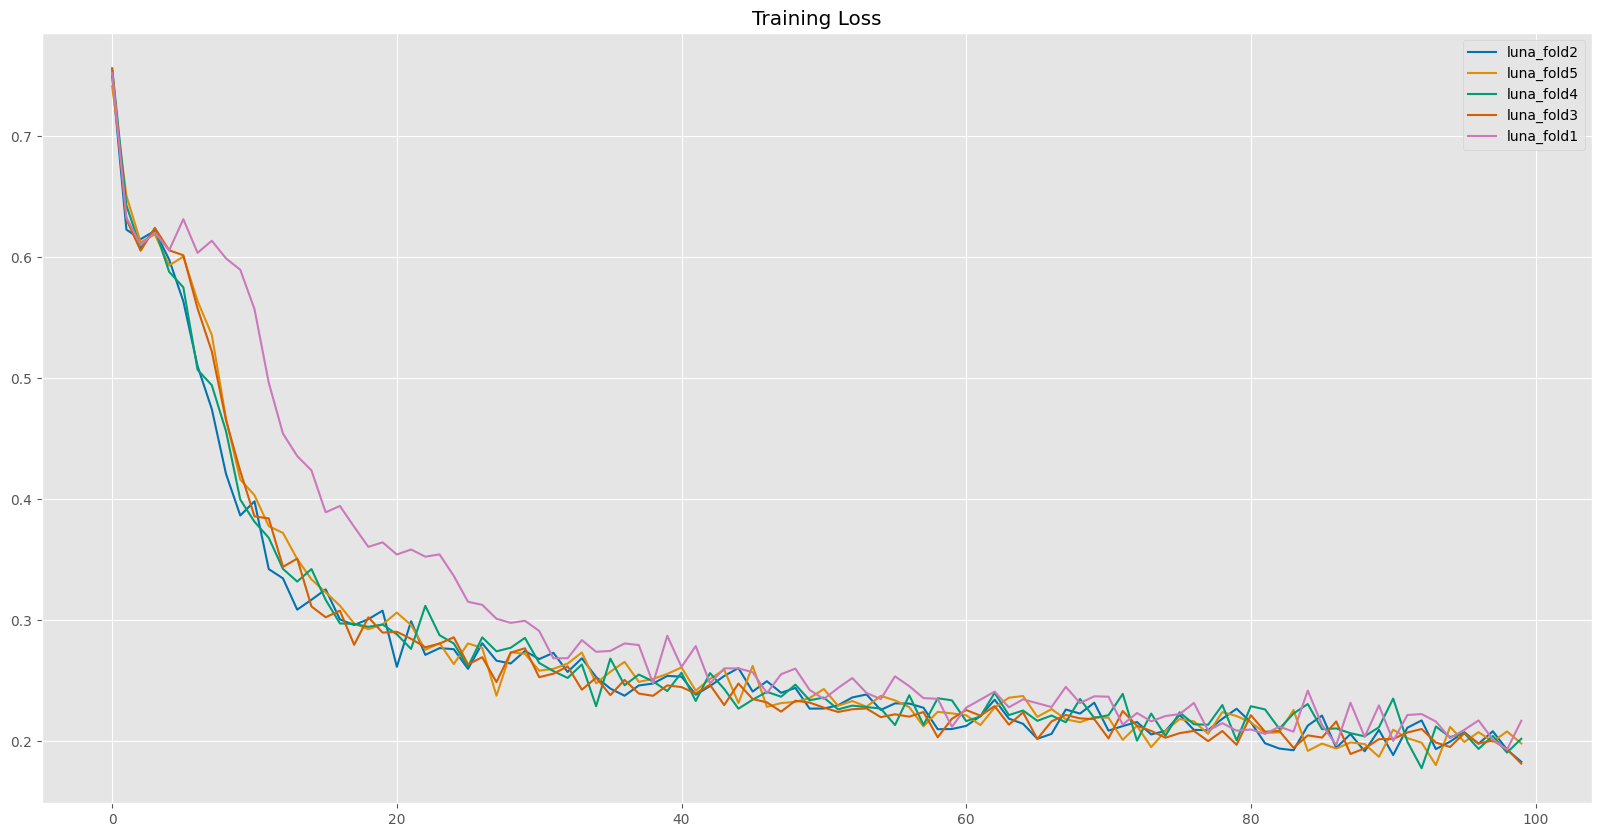

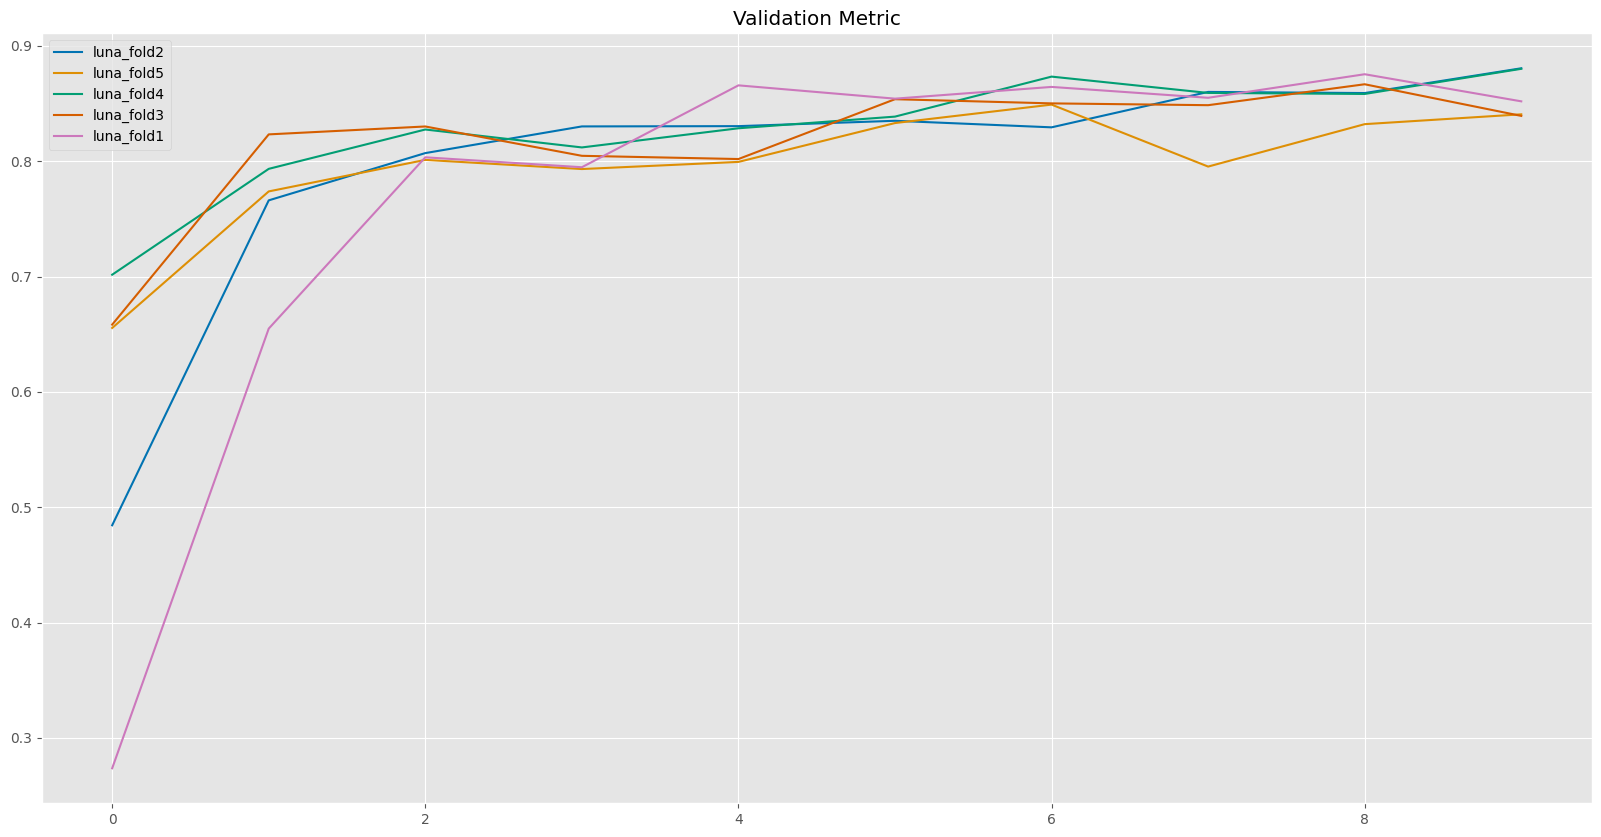

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_training_data(fold_metrics):


    # Generate a colorblind-friendly palette with 5 colors
    color_palette = sns.color_palette("colorblind", 5)

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))    
    for idx, (fold, data) in enumerate(fold_metrics.items()):

        ax.plot(data['avg_train_loss'], label=fold, color=color_palette[idx])
        ax.set_title('Training Loss')
        ax.legend()

    plt.show()


    
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    for idx, (fold, data) in enumerate(fold_metrics.items()):
        ax.plot(data['val_metric'], label=fold, color=color_palette[idx])
        ax.set_title('Validation Metric')
        ax.legend()
    
    plt.style.use('ggplot')
    plt.show()

    
plot_training_data(fold_metrics)
d = [fold_metrics['luna_fold1']['val_metric'].values, fold_metrics['luna_fold2']['val_metric'].values, fold_metrics['luna_fold3']['val_metric'].values, fold_metrics['luna_fold4']['val_metric'].values, fold_metrics['luna_fold5']['val_metric'].values]
d = pd.DataFrame(d).T.rename(columns={0:'fold1',1:'fold2',2:'fold3',3:'fold4',4:'fold5'}).head(10)